#  API
The CarbonInterface API estimates de CO2 emissions from electric energy consuption.






In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/maxhumber/carboninterface.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/maxhumber/carboninterface.git to /tmp/pip-req-build-lg6dkxu9
  Running command git clone -q https://github.com/maxhumber/carboninterface.git /tmp/pip-req-build-lg6dkxu9


In [ ]:
from carboninterface import CarbonInterface

In [ ]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

API request

In [ ]:
ci = CarbonInterface('5cXlm48ypfiTJtBr30kA')

<Response [200]>


In [ ]:
ci = CarbonInterface(api_key='5cXlm48ypfiTJtBr30kA', units="mt")

<Response [200]>


In [ ]:
consum_usa = pd.read_csv('/content/drive/MyDrive/DaSc22005/Modulo3_Python/USA.csv')

In [ ]:
consum_usa.shape

(42, 3)

In [ ]:
consum_usa.dtypes

Fecha              int64
Generación GWh    object
Consumo GWh       object
dtype: object

In [ ]:
consum_usa.head()

,Fecha,Generación GWh,Consumo GWh
0,2021,4.164.565,3.979.280
1,2020,4.048.658,3.897.887
2,2019,4.162.813,3.989.378
3,2018,4.207.817,4.032.628
4,2017,4.058.261,3.888.306


Data frame cleaning

In [ ]:
col_names = {
    'Fecha':'year',
    'Generación GWh': 'production(GWh)',
    'Consumo GWh': 'consume(GWh)'
}


In [ ]:
consum_usa = consum_usa.rename(columns = col_names)
consum_usa.head()

,year,production(GWh),consume(GWh)
0,2021,4.164.565,3.979.280
1,2020,4.048.658,3.897.887
2,2019,4.162.813,3.989.378
3,2018,4.207.817,4.032.628
4,2017,4.058.261,3.888.306


Changing data format

In [ ]:
consum_usa['production(GWh)'] = consum_usa['production(GWh)'].str.replace('.','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
consum_usa.head()

,year,production(GWh),consume(GWh)
0,2021,4164565,3.979.280
1,2020,4048658,3.897.887
2,2019,4162813,3.989.378
3,2018,4207817,4.032.628
4,2017,4058261,3.888.306


In [ ]:
consum_usa['consume(GWh)'] = consum_usa['consume(GWh)'].str.replace('.','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
consum_usa.head()

,year,production(GWh),consume(GWh)
0,2021,4164565,3979280
1,2020,4048658,3897887
2,2019,4162813,3989378
3,2018,4207817,4032628
4,2017,4058261,3888306


In [ ]:
consum_usa['production(GWh)'] = consum_usa['production(GWh)'].astype(float)

In [ ]:
consum_usa['consume(GWh)'] = consum_usa['consume(GWh)'].astype(float)

In [ ]:
consum_usa.dtypes

year                 int64
production(GWh)    float64
consume(GWh)       float64
dtype: object

In [ ]:
consum_usa.head()

,year,production(GWh),consume(GWh)
0,2021,4164565.0,3979280.0
1,2020,4048658.0,3897887.0
2,2019,4162813.0,3989378.0
3,2018,4207817.0,4032628.0
4,2017,4058261.0,3888306.0


In [ ]:
cons_conver= consum_usa['consume(GWh)']*1000

Function to estimate the CO2 emissions from 1980 to 2021

In [ ]:
def carbon_em(consume):
  return ci.estimate_electricity(amount= consume ,country= 'US')

In [ ]:
ems_years = cons_conver.map(carbon_em)

In [ ]:
ems_years.head()

0    1.604706e+09
1    1.571883e+09
2    1.608778e+09
3    1.626219e+09
4    1.568019e+09
Name: consume(GWh), dtype: float64

In [ ]:
ems_years.tail()

37    9.217822e+08
38    8.674055e+08
39    8.413893e+08
40    8.658521e+08
41    8.446186e+08
Name: consume(GWh), dtype: float64

Anual emissions plot 

In [ ]:
df =pd.DataFrame({
      'Year': consum_usa['year'],
      'CO2 Emissions': ems_years
      })

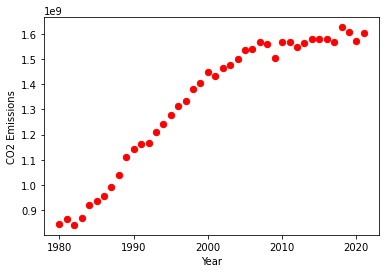

In [ ]:
scatter_plot=df.plot.scatter(x='Year',y='CO2 Emissions',s=40,c="Red")
scatter_plot.plot()
plt.show()